In [576]:
import os
import carbon_tracker

# Create the emissions folder if it doesn't exist
if not os.path.exists('./emissions'):
	os.makedirs('./emissions')

#improt file in "Sad-Brain-Analytics-Hackathon\carbon_tracker.py"
%run carbon_tracker.py
carbon_tracker.start_tracker()

# **Import libraries:**

In [577]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
carbon_tracker.start_tracker()
carbon_tracker.update_project_name('Import Libraries')

c:\Users\oo\Desktop\Github DEV\Sad-Brain-Analytics-Hackathon\venv\Lib\site-packages\codecarbon\output_methods\file.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame.from_records([dict(total.values)])])


# **EDA:**

In [578]:
df = pd.read_csv("final_depression_dataset_1.csv")
df.head()
carbon_tracker.update_project_name('Read dataset')

In [579]:
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [580]:
df.shape

(2556, 19)

In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

### *Handling duplicated:*

In [582]:
df.duplicated().sum()

np.int64(0)

No duplicated values in our dataset

### *Handling null values:*

In [583]:
df.isnull().sum()

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

Before making our decision about how we should handle the null values, let's explore more the relationships between the variables.

In [584]:
df.nunique()

Name                                     216
Gender                                     2
Age                                       43
City                                      30
Working Professional or Student            2
Profession                                35
Academic Pressure                          5
Work Pressure                              5
CGPA                                     312
Study Satisfaction                         5
Job Satisfaction                           5
Sleep Duration                             4
Dietary Habits                             3
Degree                                    27
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
dtype: int64

In [585]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,2556.000000,502.000000,2054.000000,502.000000,502.000000,2054.000000,2556.000000,2556.000000
mean,39.043036,3.003984,3.021908,7.567809,3.075697,3.015093,6.023865,2.968701
std,12.260596,1.390007,1.417312,1.465367,1.373490,1.418432,3.771743,1.415527
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,2.000000,6.210000,2.000000,2.000000,3.000000,2.000000
50%,39.000000,3.000000,3.000000,7.605000,3.000000,3.000000,6.000000,3.000000
75%,50.000000,4.000000,4.000000,8.825000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000


**By examining the column names, the null value counts, and count from df.describe(), Academic Pressure, CGPA, & Study Satisfaction have 2054 missing values. We can cross-reference this with df.describe()!**
**The count in df.describe() for these columns: Only 502 non-null entries are present, so based on our context (working professionals vs students), students are expected to have values in Academic Pressure, CGPA, and Study Satisfaction, while working professionals will likely have nulls for these columns, as these are not applicable to them.**

*The count of 502 non-null values in these columns suggests only students are responding to these questions, while working professionals would have nulls in these columns since they don't pertain to them.*

**In the other hand, Work Pressure & Job Satisfaction have 502 missing values, which likely corresponds to the students who don't have professional work pressure or job satisfaction, as they aren't employed yet. From df.describe(), for Work Pressure and Job Satisfaction, the count of non-null values is 2054, suggesting that working professionals are responding to these questions.** 

*The missing values are likely due to students who don’t yet have a job, hence they don't fill out these columns!*

**Also, the column name will not impact our model traainig, so we can drop it,because we will not need it in our analysis**


In [586]:
df = df.drop('Name', axis=1)
df.shape

(2556, 18)

In [587]:
# Check for nulls in columns depending on the value of 'Working Professional or Student'
if 'Working Professional' in df['Working Professional or Student'].values:
    # For Working Professional, check nulls in Profession, Work Pressure, and Job Satisfaction
    print("Null values for Working Professional related columns:")
    print(df[df['Working Professional or Student'] == 'Working Professional'][['Work Pressure', 'Job Satisfaction']].isnull().sum())

if 'Student' in df['Working Professional or Student'].values:
    # For Student, check nulls in Academic Pressure, CGPA, and Study Satisfaction
    print("Null values for Student related columns:")
    print(df[df['Working Professional or Student'] == 'Student'][['Academic Pressure', 'CGPA', 'Study Satisfaction']].isnull().sum())


Null values for Working Professional related columns:
Work Pressure       0
Job Satisfaction    0
dtype: int64
Null values for Student related columns:
Academic Pressure     0
CGPA                  0
Study Satisfaction    0
dtype: int64


**No null values in our dataset**

*We will seperate our dataset after based on either the person is a professional worker or student!*

## *Datatype Casting:*

In [588]:
import numpy as np

def print_dtype_info():
    # Define types to inspect
    dtypes = [np.int8, np.int16, np.int32, np.int64, np.uint8, np.uint16, 
              np.uint32, np.uint64, np.float16, np.float32, np.float64]
    
    print(f"{'Data Type':<10} {'Size (Bytes)':<12} {'Min Value':<25} {'Max Value':<25}")
    print("-" * 75)
    
    for dtype in dtypes:
        info = np.iinfo(dtype) if np.issubdtype(dtype, np.integer) else np.finfo(dtype)
        print(f"{dtype.__name__:<10} {np.dtype(dtype).itemsize:<12} {info.min:<25} {info.max:<25}")

print_dtype_info()


Data Type  Size (Bytes) Min Value                 Max Value                
---------------------------------------------------------------------------
int8       1            -128                      127                      
int16      2            -32768                    32767                    
int32      4            -2147483648               2147483647               
int64      8            -9223372036854775808      9223372036854775807      
uint8      1            0                         255                      
uint16     2            0                         65535                    
uint32     4            0                         4294967295               
uint64     8            0                         18446744073709551615     
float16    2            -65504.0                  65504.0                  
float32    4            -3.4028234663852886e+38   3.4028234663852886e+38   
float64    8            -1.7976931348623157e+308  1.7976931348623157e+308  


 *For memory efficiency, string dtype is more efficient than object because it is optimized for text data, while object dtype can store mixed types but uses more memory for purely textual data*

In [589]:
def calculate_memory(df):
    mem_usage = df.memory_usage(deep=True).sum()
    return mem_usage


In [590]:
df['Profession'] = df['Profession'].fillna('Uknown')

In [591]:
initial_memory = calculate_memory(df)
print(f"Memory usage before type conversions: {initial_memory} bytes")

df['Sleep Duration'] = df['Sleep Duration'].astype('string')
df['Dietary Habits'] = df['Dietary Habits'].astype('string')
df['Degree'] = df['Degree'].astype('string')
df['City'] = df['City'].astype('string')

df['Age'] = df['Age'].astype('int8')  # Better for larger numbers
df['Work/Study Hours'] = df['Work/Study Hours'].astype('int8')
df['Financial Stress'] = df['Financial Stress'].astype('int8')

# Handle potential float to int conversion safely
df['Work Pressure'] = df['Work Pressure'].fillna(0).round().astype('int8')
df['Academic Pressure'] = df['Academic Pressure'].fillna(0).round().astype('int8')
df['Job Satisfaction'] = df['Job Satisfaction'].fillna(0).round().astype('int8')
df['Study Satisfaction'] = df['Study Satisfaction'].fillna(0).round().astype('int8')

# Categorical conversions
df['Gender'] = df['Gender'].astype('category')
df['Working Professional or Student'] = df['Working Professional or Student'].astype('category')
df['Profession'] = df['Profession'].astype('category')
df['Depression'] = df['Depression'].astype('category')
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].astype('category')
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].astype('category')
final_memory = calculate_memory(df)
print(f"Memory usage after type conversions: {final_memory} bytes")

# Memory savings
memory_saved = initial_memory - final_memory
print(f"Memory saved: {memory_saved} bytes ({(memory_saved / initial_memory) * 100:.2f}% reduction)")
print(df.dtypes)

Memory usage before type conversions: 1598700 bytes
Memory usage after type conversions: 641344 bytes
Memory saved: 957356 bytes (59.88% reduction)
Gender                                         category
Age                                                int8
City                                     string[python]
Working Professional or Student                category
Profession                                     category
Academic Pressure                                  int8
Work Pressure                                      int8
CGPA                                            float64
Study Satisfaction                                 int8
Job Satisfaction                                   int8
Sleep Duration                           string[python]
Dietary Habits                           string[python]
Degree                                   string[python]
Have you ever had suicidal thoughts ?          category
Work/Study Hours                                   int8
Financial St

### *Detect & Remove outliers:*

Based on the describe() summary, the statistical range for numeric columns (min, max, and percentiles) is consistent with expected data distribution, suggesting no significant outliers in the dataset.

<Axes: ylabel='Financial Stress'>

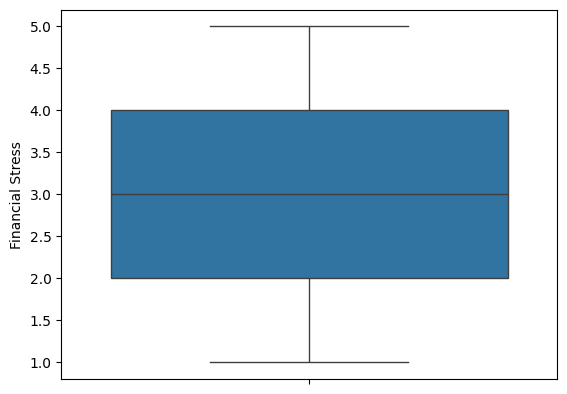

In [592]:
sns.boxplot(df['Financial Stress'])

<Axes: xlabel='Age'>

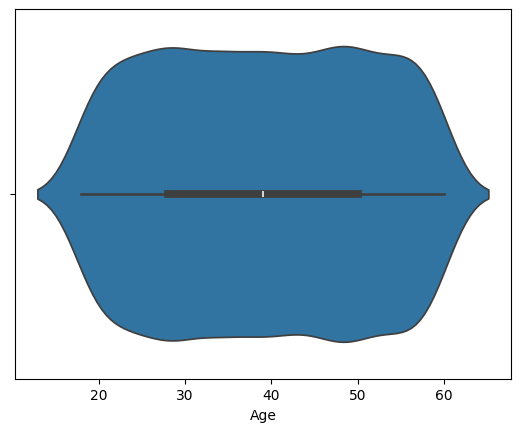

In [593]:
sns.violinplot(data=df, x="Age")

<Axes: xlabel='Work Pressure'>

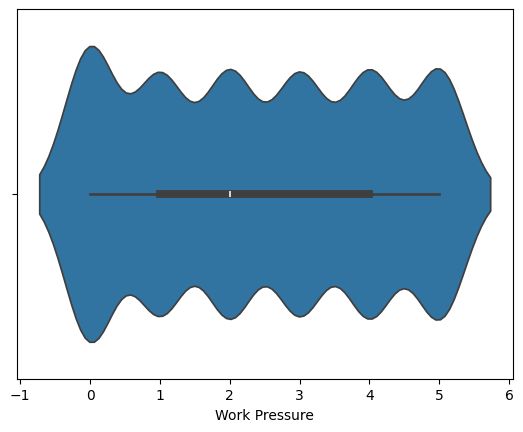

In [594]:
sns.violinplot(data=df, x='Work Pressure')

<Axes: xlabel='Job Satisfaction'>

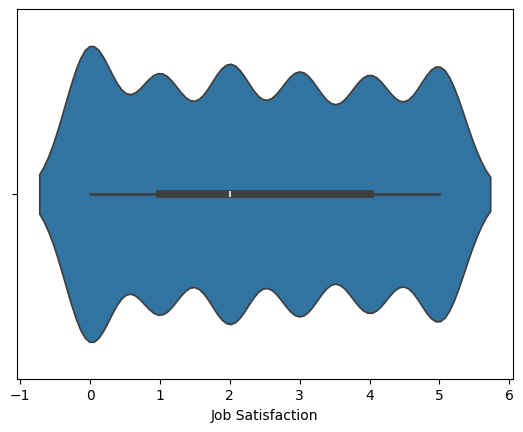

In [595]:
sns.violinplot(data=df, x='Job Satisfaction')

<Axes: xlabel='Work/Study Hours'>

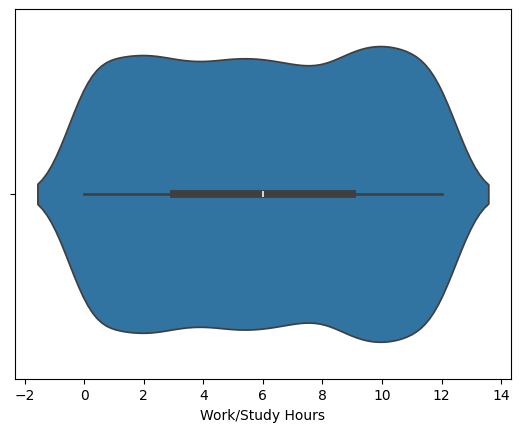

In [596]:
sns.violinplot(data=df, x='Work/Study Hours')

<Axes: xlabel='Financial Stress'>

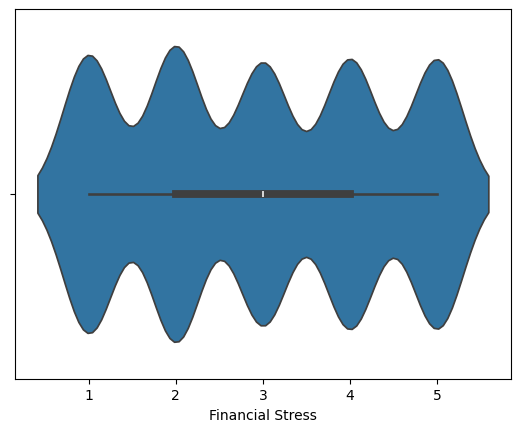

In [597]:
sns.violinplot(data=df, x='Financial Stress')

In [598]:
df['Degree'].unique()

<StringArray>
[      'MA',    'B.Com',    'M.Com',       'MD',       'BE',      'MCA',
       'BA',      'LLM',      'BCA', 'Class 12',     'B.Ed',   'M.Tech',
      'LLB',   'B.Arch',       'ME',      'MBA',  'M.Pharm',     'MBBS',
      'PhD',      'BSc',      'MSc',      'MHM',      'BBA',      'BHM',
   'B.Tech',     'M.Ed',  'B.Pharm']
Length: 27, dtype: string

### *Categorize Degrees:*

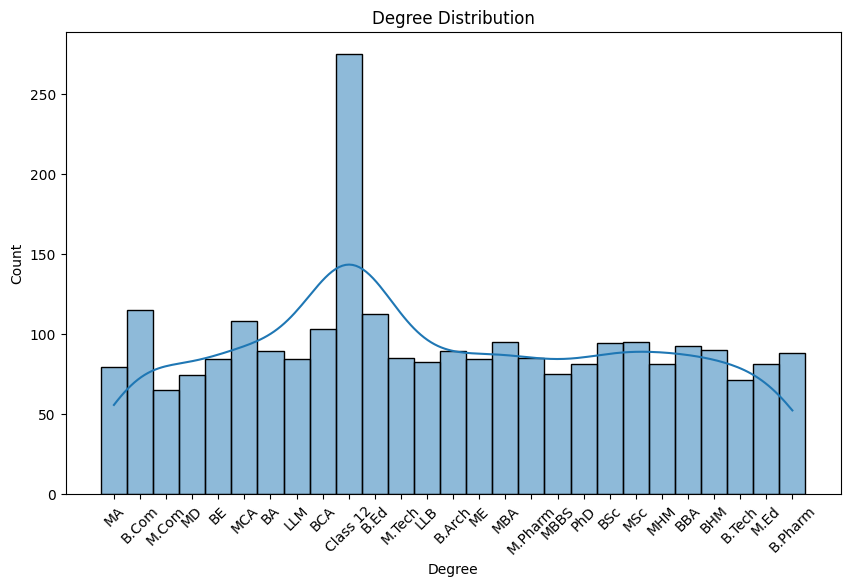

In [599]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Degree'], bins=10, kde=True)  # kde=True adds a smooth curve for better visualization
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [600]:
def categorize_degree(degree):
    # Pre-University (Class 12)
    pre_university_degrees = ['Class 12']
    
    # Undergraduate degrees
    undergrad_degrees = [
        'B.Com', 'BA', 'B.Tech', 'B.Sc', 'B.Arch', 'B.Ed', 
        'B.Pharm', 'LLB', 'BBA', 'BHM', 'BE', 'BCA'
    ]
    
    # Postgraduate degrees
    postgrad_degrees = [
        'M.Com', 'MA', 'M.Tech', 'M.Sc', 'M.Ed', 'MBA', 
        'MCA', 'LLM', 'ME', 'MHM', 'M.Pharm'
    ]
    
    # Doctorate & Professional
    doctorate_degrees = ['PhD', 'MD', 'MBBS']

    # Categorization logic
    if degree in pre_university_degrees:
        return 'Pre-University'
    elif degree in undergrad_degrees:
        return 'Undergraduate'
    elif degree in postgrad_degrees:
        return 'Postgraduate'
    elif degree in doctorate_degrees:
        return 'Doctorate/Professional'
    else:
        return 'Other'

# Apply categorization
df['Degree'] = df['Degree'].apply(categorize_degree_india)



In [601]:
# Group the data by Degree and calculate mean (or median) for certain features
degree_analysis = df.groupby('Degree').agg({
    'Job Satisfaction' : 'mean',
    'Work Pressure' : 'mean',
    'Study Satisfaction' : 'mean',
    'Academic Pressure' : 'mean'
})
degree_analysis


,Job Satisfaction,Work Pressure,Study Satisfaction,Academic Pressure
Degree,,,,
Doctorate/Professional,2.413043,2.434783,0.539130,0.573913
Other,2.439153,2.492063,0.555556,0.571429
Postgraduate,2.546635,2.574970,0.469894,0.434475
Pre-University,1.974545,1.949091,1.214545,1.200000
Undergraduate,2.440394,2.422660,0.574384,0.561576


*Let's do same for Ages*

### *Categorize Ages:*

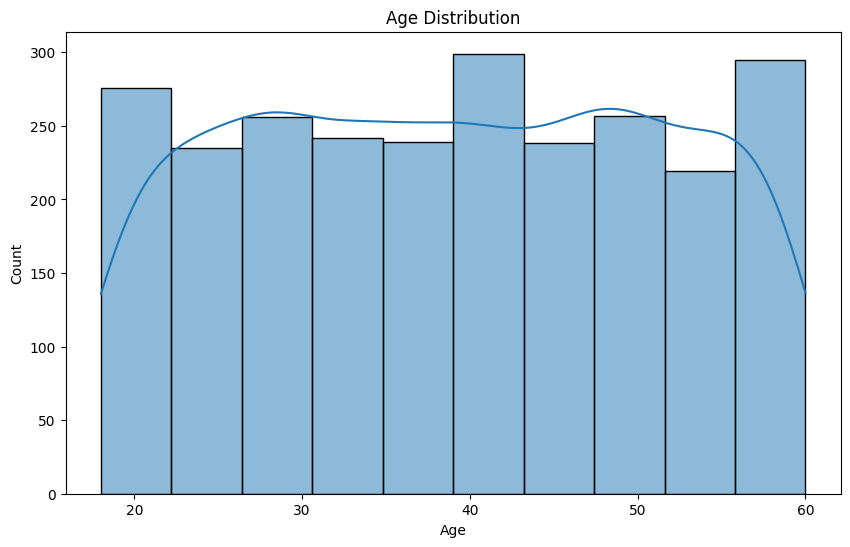

In [602]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)  # kde=True adds a smooth curve for better visualization
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [603]:
# Define age group bins and labels
bins = [0, 29, 44, 54, 65, float('inf')]
labels = ['Under 25', '25-34', '35-44', '45-54', '55+']

# Assign age groups using pd.cut
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)



In [604]:
age_analysis = df.groupby('Age').agg({
    'Study Satisfaction' : 'mean',
    'Academic Pressure' : 'mean',
    'Job Satisfaction' : 'mean',
    'Work Pressure' : 'mean'
 })
age_analysis

C:\Users\oo\AppData\Local\Temp\ipykernel_1468\1481487065.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = df.groupby('Age').agg({


,Study Satisfaction,Academic Pressure,Job Satisfaction,Work Pressure
Age,,,,
Under 25,1.514045,1.481742,1.570225,1.523876
25-34,0.525959,0.511287,2.531603,2.486456
35-44,0.000000,0.000000,2.937908,3.068627
45-54,0.000000,0.000000,2.988439,3.008671
55+,NaN,NaN,NaN,NaN


*From the observed patterns in the data distribution and variable dependencies, we can reasonably conclude that our initial hypothesis about the independence between study-related and work-related variables holds.The clear trends and differences observed across age groups in the visualizations further support the distinction between professional and student datasets. These insights validate our decision to handle these variables differently during data preparation and model development, enabling a tailored approach based on distinct characteristics of each group.*

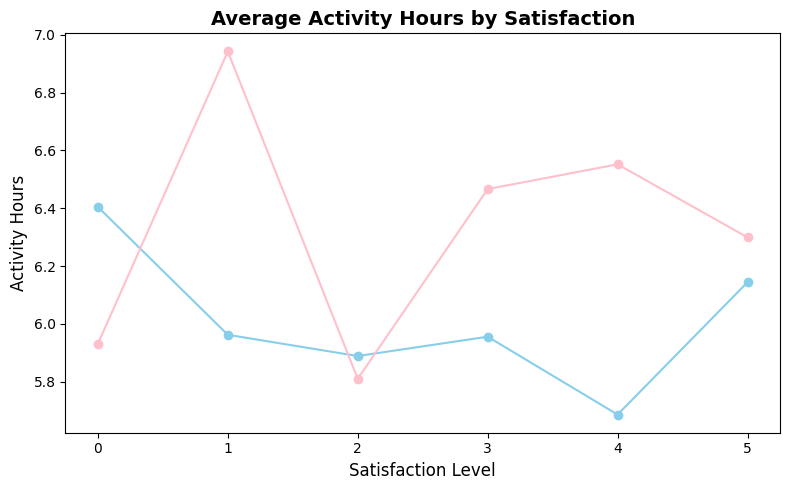

In [605]:
#Rename Work/Study Hours re just number of activity hours for Workers & Students, let's just rename it
df.rename(columns={'Work/Study Hours': 'Activity Hours'}, inplace=True)

job_satisfaction_by_activity_hours = df.groupby('Job Satisfaction')['Activity Hours'].mean()

study_satisfaction_by_activity_hours = df.groupby('Study Satisfaction')['Activity Hours'].mean()

fig, ax = plt.subplots(figsize=(8, 5))

job_satisfaction_by_activity_hours.plot(
    kind = 'line',
    ax=ax,
    color='skyblue',
    marker = 'o'
    # edgecolor='black'
)

study_satisfaction_by_activity_hours.plot(
    kind = 'line',
    ax=ax,
    color='pink',
    marker='o'
)


ax.set_title('Average Activity Hours by Satisfaction', fontsize=14, fontweight='bold')
ax.set_xlabel('Satisfaction Level', fontsize=12)
ax.set_ylabel('Activity Hours', fontsize=12)
fig.tight_layout()

C:\Users\oo\AppData\Local\Temp\ipykernel_1468\1689509657.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')
C:\Users\oo\AppData\Local\Temp\ipykernel_1468\1689509657.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(city_depression_percentage.index, rotation=45, ha='right')


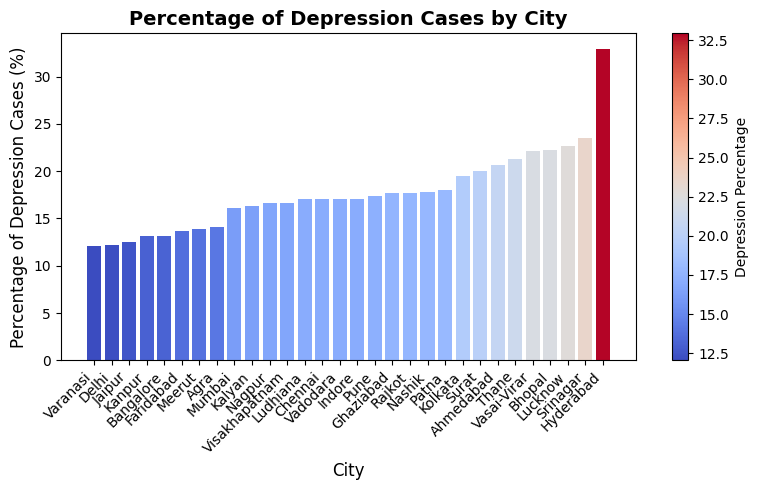

In [606]:
import matplotlib.cm as cm
import numpy as np

city_depression_count = df[df['Depression'] == 'Yes'].groupby('City').size()

city_total_count = df.groupby('City').size()
city_depression_percentage = (city_depression_count / city_total_count) * 100

# Step 4: Normalize the percentage values between 0 and 1
norm = plt.Normalize(city_depression_percentage.min(), city_depression_percentage.max())

# Step 5: Choose a colormap (from blue to red)
cmap = cm.get_cmap('coolwarm')

# Step 6: Create the bar plot with the color gradient
fig, ax = plt.subplots(figsize=(8, 5))
city_depression_percentage = city_depression_percentage.sort_values()

bars = ax.bar(city_depression_percentage.index, city_depression_percentage, 
              color=cmap(norm(city_depression_percentage)))

# Step 7: Customize the chart
ax.set_title('Percentage of Depression Cases by City', fontsize=14, fontweight='bold')
ax.set_xlabel('City', fontsize=12)
ax.set_ylabel('Percentage of Depression Cases (%)', fontsize=12)
ax.set_xticklabels(city_depression_percentage.index, rotation=45, ha='right')
fig.tight_layout()

# Step 8: Add a colorbar to show the scale
cbar = plt.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax)
cbar.set_label('Depression Percentage')

# Show the plot
plt.show()


*From this plot, we can conclude that there are some cities where depression rates are higher than in others. This suggests that the 'City' variable plays an important role in our model training. We will further explore this in the visualizations*

*Before splitting the dataset into Working Professionals and Students, we conducted an initial Exploratory Data Analysis (EDA) to understand the relationships between variables and identify any patterns or insights that would help guide our approach.*

**Summary of the steps:**
- Initial Data Exploration 
- Identifying Patterns and Dependencies
- Variable Dependencies (exploring the relationships between different features)
- Exploring the Dataset by Category (To ensure we were correctly capturing the differences between the two groups, we looked at the distribution of categorical variables such as Degree)

In [607]:
# Dataset for Working Professionals: drop unnecessary columns
df_work_professionals = df[df['Working Professional or Student'] == 'Working Professional']
df_work_professionals = df_work_professionals.drop(columns=['Academic Pressure', 'Study Satisfaction', 'CGPA'])

# Dataset for Students: drop unnecessary columns
df_students = df[df['Working Professional or Student'] == 'Student']
df_students = df_students.drop(columns=['Work Pressure', 'Job Satisfaction', 'Profession'])

# Now both datasets are clean and ready for training and analysis


In [608]:
# Dataset for Working Professionals: drop unnecessary columns
df_work_professionals = df[df['Working Professional or Student'] == 'Working Professional']
df_work_professionals = df_work_professionals.drop(columns=['Academic Pressure', 'Study Satisfaction', 'CGPA'])

# Dataset for Students: drop unnecessary columns
df_students = df[df['Working Professional or Student'] == 'Student']
df_students = df_students.drop(columns=['Work Pressure', 'Job Satisfaction', 'Profession'])

# Now both datasets are clean and ready for training and analysis


In [609]:
carbon_tracker.update_project_name('EDA')
carbon_tracker.update_project_name('EDA')

**Now both datasets are clean and ready for visuaalization & training**
